# Pre-written code for use of RSG lists 


<font size="4"> Contains code for simple manipulation of the data including: </font>
* <font size="3"> Plotting </font>
* <font size="3"> Calling specific RSGs </font>
* <font size="3"> Searching areas of the sky </font>


In [30]:
import mwdust

from astroquery.simbad import Simbad as bad

from matplotlib import pyplot as plt
import numpy as np

import glob
import time

import os

import math
import gzip
from scipy.stats import gaussian_kde
import csv
import pandas as pd
import matplotlib.tri as tri

from astropy import units as u
import astropy.coordinates as coord
import math
import seaborn as sns

import functools as ft

### Loading Data 

In [11]:
dirbase = os.getcwd()+'/'

fname_pattern = dirbase+'Method_1_RSGs_catalog.csv'

RSGs = pd.read_csv(fname_pattern)

## Function to grab a specificed number of the highest luminosity RSGs
Return the first n rows with the largest values in luminosity column, in descending order.
The columns that are not specified are returned as well, but not used for ordering.

In [6]:
def Brightest_RSGs(num):
    """
    returns set of brightest RSGs
    
    num: number of RSGs wanted cut by brightest
    """
    RSGs_num = RSGs.nlargest(num, 'log(L/L.)')
    return RSGs_num

## Function to grab RSGs based on region of HR diagram 
Grabbing those in region A, region B, or those that make it due to errors

* Region A: 
 * Brightest and with little AGB contamination
* Region B: 
 * Bright and slightly higher chance of but still low AGB contamination
* Region errors: 
 * Stars whose error bars are in either Region A or Region B but whose calculated value does not make cuts for Region A or B

In [12]:
def RSGs_by_region(regions):
    """
    calls red supergiants by region and returns a dataframe of them 
    
    regions must be input as a string
    """
    RSGs_region = RSGs.loc[RSGs['Region'].str.contains(regions)]

    return RSGs_region

## Function to grab RSGs based on assigned spectral types and subtypes

In [ ]:
# **************** if you only want to choice between spectral type ***********************************

def RSGs_of_sptype(sptype):
    """
    returns dataframe of RSGS with specificed spectral type 
    
    sptype: spectral class (K or M), must be input as a string
    """
    
    RSGs_sptype = RSGs.loc[RSGs['SpType_a'].str.contains(sptype)]

    return RSGs_sptype

In [ ]:
# ***************** if you want to specific but a spectral type and subtype *****************************

def RSGs_of_sub_sptype(subtype_start, subtype_end, sptype):
    """
    returns dataframe of RSGs with specificed spectral type and subtype range
    
    subtype_start:# min subtype (0-10 including half integers)
    subtype_end: # max subtype - must be input as a string
    """

    ran = np.arange(subtype_start, subtype_end+0.5, 0.5)
    y= ''
    for element in ran:
        if element == ran[-1]:
            y = y+sptype+str(element)
        else:
            y = y+sptype+str(element)+'|'


    RSGs_subtype = RSGs.loc[(df['SpType_a'].str.contains(y)) 
                           & (RSGs['SpType_a'].str.contains(sptype))] 


    return RSGs_subtype

## Function to search region of the sky for galactic RSGs

In [22]:
import astropy.units as u
from astropy.coordinates import SkyCoord

def search_radius(ra, dec, form, coord_frame, radius, radius_unit):
    """
    given ra and dec, returns dataframe of RSGs within the given radius
    
    form: hms or degree - must be input as string
        if hms, ra and dec must be input as strings with units
        example: '5h23m34.5s', '-69d45m22s'
    coord_frame: icrs, fk5, - must be input as a string
    radius: search radius
    radius_unit: degree, seperation  must be input as a string
    
    """
    if form == 'hms':
        c1 = SkyCoord(str(ra), str(dec), frame=coord_frame)
    if form == 'degree':
        c1 = SkyCoord(ra*u.degree, dec*u.degree, frame=coord_frame)
    
#     dirbase = os.getcwd()+'/data'
#     fname_pattern = dirbase+'Method_1_RSGs_catalog.csv'
#     RSGs = pd.read_csv(fname_pattern)
    
    RSG_lists = pd.DataFrame()
    
    for index, row in RSGs.iterrows():
        c_icrs = SkyCoord(row['ra']*u.degree, row['dec']*u.degree, frame='icrs')
        sep = c1.separation(c_icrs)
    
        if radius_unit == 'degree':
            if sep.degree <= radius:
                frames = [RSG_lists, RSGs.loc[RSGs.index == index]]
                RSG_lists = pd.concat(frames)
                
            else:
                break
        elif radius_unit == 'arcsecond':
            if sep.arcsecond <= radius:
                frames = [RSG_lists, RSGs.loc[RSGs.index == index]]
                RSG_lists = pd.concat(frames)
            else:
                break 
    
    
    return RSG_lists

# Plot: Galactic plane in equatorial coordinates (Mollweide projection)

Includes three versions depending on what you want to show/highlight 

In [27]:
# Conversion to radians and creation of lists required for all three versions

RSGs['ra_1'] = RSGs['ra'] - 180
RSGs['ra_radians'] = (RSGs['ra_1'] * (math.pi/180))
RSGs['dec_radians'] = (RSGs['dec'] * (math.pi/180))

ra = RSGs['ra_radians'].tolist()
dec = RSGs['dec_radians'].tolist()

### 1. Scatter plot only

Text(0.5, 1.0, 'Galactic plane in equatorial coordinates (Mollweide projection)')

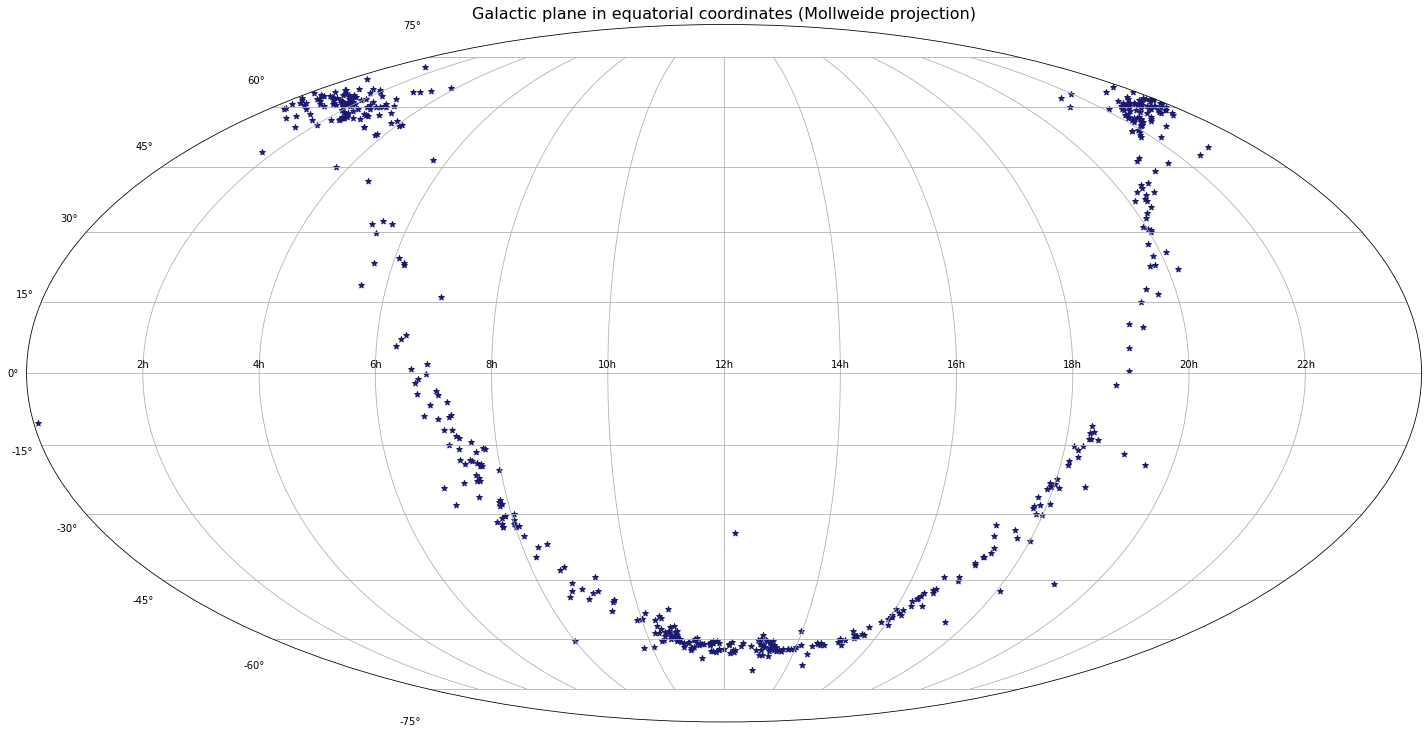

In [28]:
fig = plt.figure(figsize=(25,20))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(ra, dec, marker='*', c='midnightblue', alpha=1)
ax.set_xticklabels(['2h','4h','6h','8h','10h','12h','14h','16h','18h','20h', '22h'])
ax.grid(True)

plt.title('Galactic plane in equatorial coordinates (Mollweide projection)', fontsize='16')
#plt.savefig()

### 2. Scatter plot with density contours 

Text(0.5, 1.0, 'Galactic plane in equatorial coordinates (Mollweide projection)')

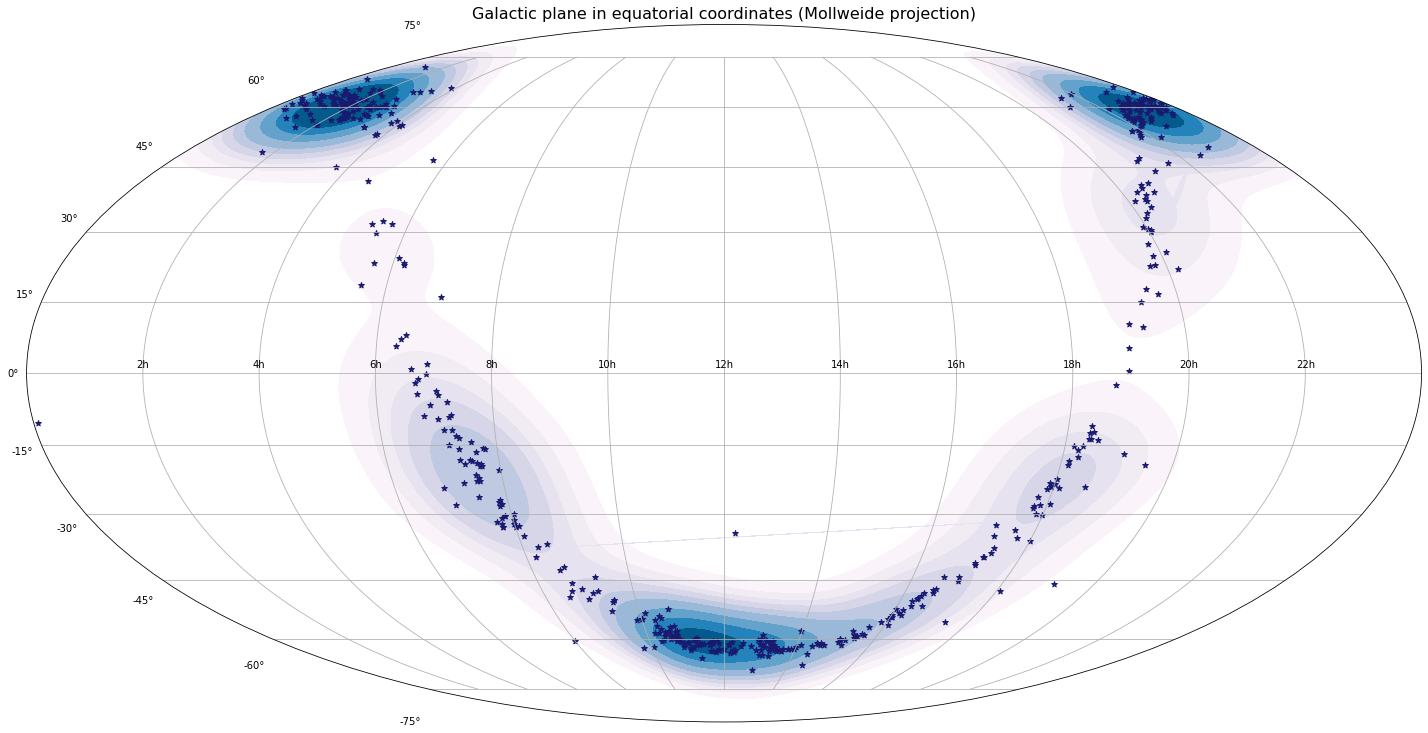

In [31]:
fig = plt.figure(figsize=(25,20))
ax = fig.add_subplot(111, projection="mollweide")
sns.kdeplot(x=ra, y=dec, cmap="PuBu", shade=True, bw_adjust=.4, thresh=0.1 )
ax.scatter(ra, dec, marker='*', c='midnightblue', alpha=1)
ax.set_xticklabels(['2h','4h','6h','8h','10h','12h','14h','16h','18h','20h', '22h'])
ax.grid(True)

plt.title('Galactic plane in equatorial coordinates (Mollweide projection)', fontsize='16')
#plt.savefig()

### 3. Scatter plot sized by $\frac{1}{d^2}$  and density contours 

Text(0.5, 1.0, 'Galactic plane in equatorial coordinates (Mollweide projection)')

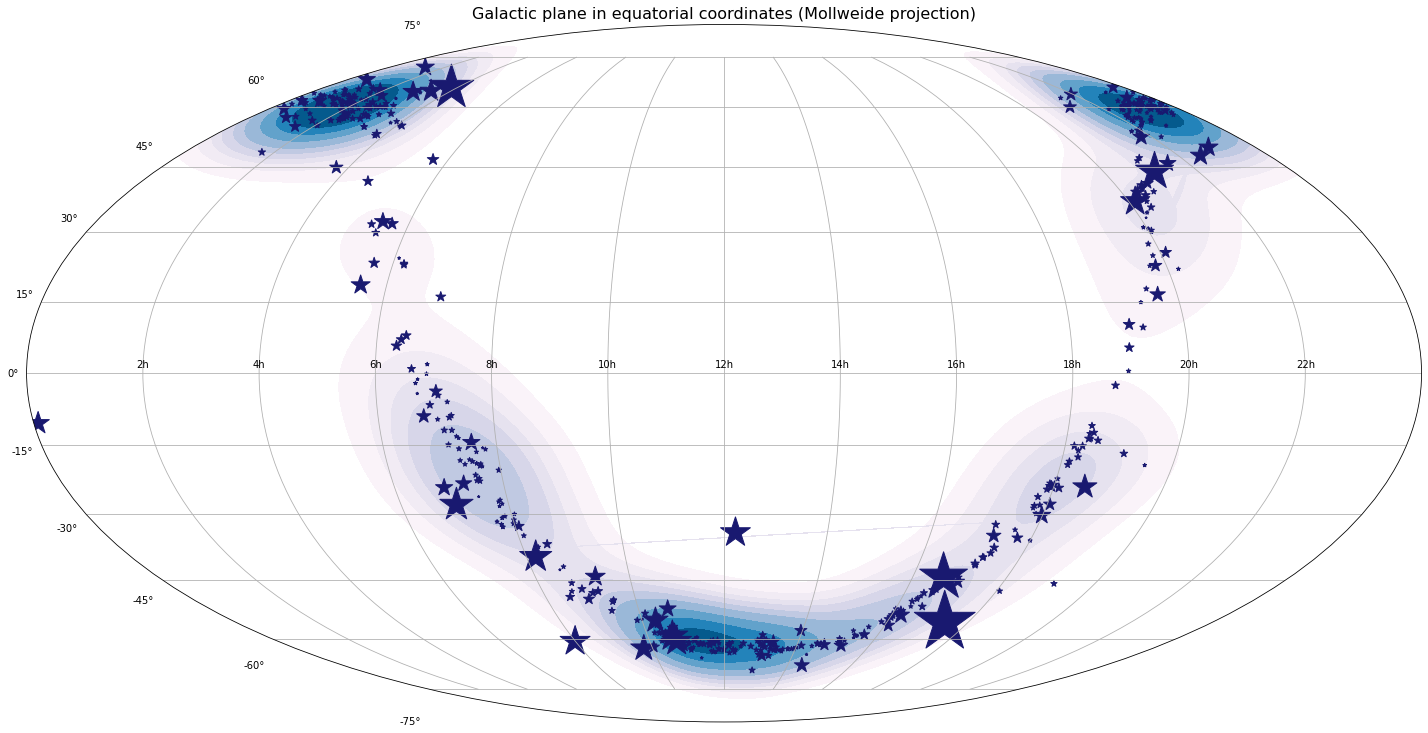

In [36]:
RSGs['1/d2'] = (1 / (RSGs['r_med_geo']**2)) * (2 * 10**8)
size = RSGs['1/d2']


fig = plt.figure(figsize=(25,20))
ax = fig.add_subplot(111, projection="mollweide")
sns.kdeplot(x=ra, y=dec, cmap="PuBu", shade=True, bw_adjust=.4, thresh=0.1 )
ax.scatter(ra, dec, size, marker='*', c='midnightblue', alpha=1)
ax.set_xticklabels(['2h','4h','6h','8h','10h','12h','14h','16h','18h','20h', '22h'])
ax.grid(True)

plt.title('Galactic plane in equatorial coordinates (Mollweide projection)', fontsize='16')
#plt.savefig()

# Plot: Galactic plane in galactic coordinates

In [37]:
import numpy as np
from astropy.coordinates import SkyCoord
import astropy.units as u
import matplotlib.pyplot as plt


sns.set()

def eq2gal(ra, dec):
    
    '''
    Transforms equatorial coordinates to galactic ones.
    Then prepares them for matplotlib aitoff projection. 
    '''
    
    eq = SkyCoord(ra, dec, unit=u.deg)
    gal = eq.galactic

    # Minus appears because of “mapping from the inside” issue
    l_gal, b_gal = -gal.l.wrap_at('180d').radian, gal.b.radian
    
    return l_gal, b_gal

def ecl2gal(lon_ecl, lat_ecl):
    
    '''
    Transforms ecliptic coordinates to galactic ones.
    Then prepares them for matplotlib aitoff projection.
    '''
    
    ecl = SkyCoord(lon_ecl, lat_ecl, unit=u.deg, frame='barycentricmeanecliptic')
    gal = ecl.transform_to('galactic')

    # Minus appears because of “mapping from the inside” issue
    l_gal, b_gal = -gal.l.wrap_at('180d').radian, gal.b.radian
    
    return l_gal, b_gal

Text(0.5, 1.0, 'Galactic plane in galactic coordinates')

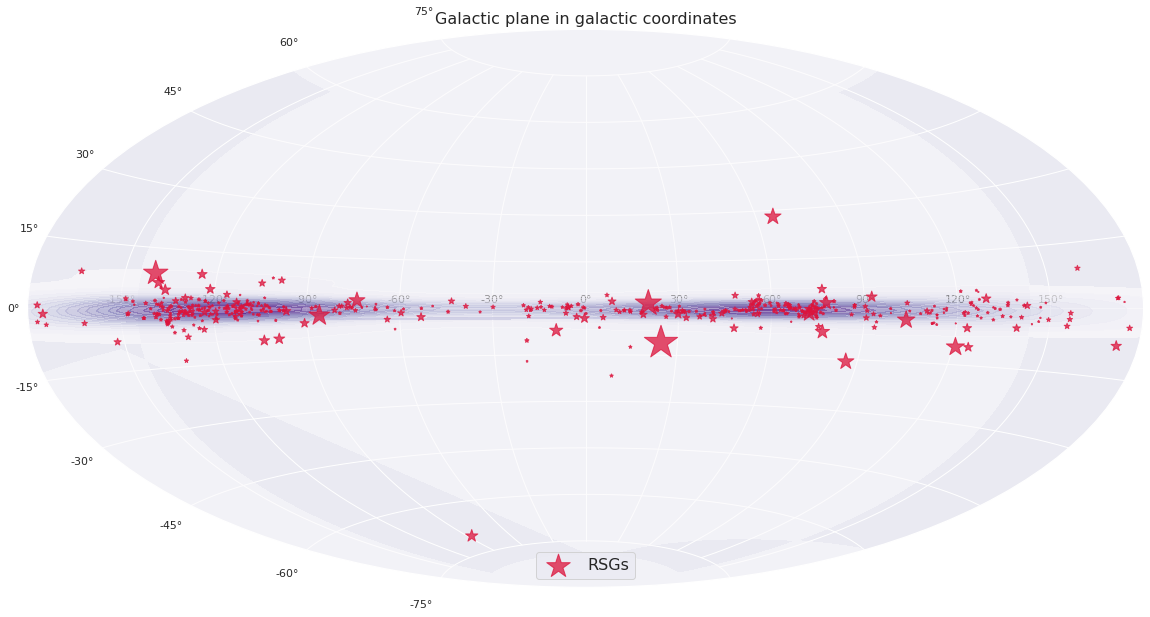

In [38]:
RSGs['1/d2'] = (1 / (RSGs['r_med_geo']**2)) * (6 * 10**7) 
size = RSGs['1/d2']


ra = RSGs['ra']
dec = RSGs['dec']
size = RSGs['1/d2']
l_eq_gal, b_eq_gal = eq2gal(ra, dec)


plt.figure(figsize=(20,50))
plt.subplot(111, projection='aitoff')
sns.kdeplot(x=l_eq_gal, y=b_eq_gal, alpha=0.5, common_norm=True, cmap="Purples", cut=20, levels=20, 
            shade=True, bw_adjust=1, thresh=0)               # denisty contour 
plt.scatter(l_eq_gal, b_eq_gal, size, marker='*', c='crimson', alpha=0.75, label='RSGs')  # scatter plot sized by 1/(d^2)

plt.grid(True)
plt.legend(fontsize=16, loc='lower center')

plt.title('Galactic plane in galactic coordinates', fontsize='16')
#plt.savefig()

# Converting to HTML file




In [40]:
import subprocess

filepath = 'HTML_file' # filepath + desired name for fil e

RSGs.to_html(filepath)
subprocess.call('wkhtmltoimage -f png --width 0 '+str(filepath)+'.html'+' '+str(filepath)+'.png', shell=True)

127